In [1]:
#Importing Necessary Libraries`

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [47]:
data = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [48]:
data.shape # 908 Rows and 25 columns in our dataset

(908, 25)

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

In [49]:
data.describe() # Only capacity_mw don't have any missing values and all other continous column have null values
# We do have ouliers in our columns
# other_fuel3, wepp_id and estimated_generation_gwh

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [60]:
data.info() # We've both numerical and categorical data in our dataset and many of our columns do have null values
# In categorical columns other_fuel1, other_fuel2, owner, geolocation_source and generation_data_source have null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   gppd_idnr               908 non-null    object 
 3   capacity_mw             908 non-null    float64
 4   latitude                862 non-null    float64
 5   longitude               862 non-null    float64
 6   primary_fuel            908 non-null    object 
 7   other_fuel1             199 non-null    object 
 8   commissioning_year      528 non-null    float64
 9   owner                   342 non-null    object 
 10  source                  908 non-null    object 
 11  url                     908 non-null    object 
 12  geolocation_source      889 non-null    object 
 13  year_of_capacity_data   520 non-null    float64
 14  generation_gwh_2013     384 non-null    fl

In [57]:
data.nunique()

country                     1
country_long                1
name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2013       364
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
generation_data_source      1
dtype: int64

In [52]:
# Observation
# # other_fuel3, wepp_id and estimated_generation_gwh don't have any values

In [53]:
data=data.drop(columns=['wepp_id','estimated_generation_gwh', 'other_fuel3',]) # Dropping the columns with no values

In [56]:
data=data.drop(columns=['other_fuel2'])

KeyError: "['other_fuel2'] not found in axis"

In [9]:
#capacity_mw and primary_fuel are two columns for prediction, 1 is numerical and 1 is categorical

In [10]:
data['country'].value_counts() # The data comprises of India only and there are no null values in this column


IND    908
Name: country, dtype: int64

In [11]:
data['country_long'].value_counts() # Only India and no null values in this column

India    908
Name: country_long, dtype: int64

In [12]:
data['primary_fuel'].value_counts() # 8 categories and Coal, hydro, solar and wind is highest contributer

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [13]:
data['generation_data_source'].value_counts() # only one class is present under this column and hence we can fill the null values with the only value

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [18]:
data.generation_data_source = data.generation_data_source.fillna('Central Electricity Authority')

In [19]:
data['generation_data_source'].value_counts() # checking

Central Electricity Authority    908
Name: generation_data_source, dtype: int64

In [14]:
data['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Unity Power Limite r World                     1
Hothur Pvt ltd                                 1
Real Estate e                                  1
Core Fuels ltd                                 1
Gmt Pvt ltd                                    1
Name: source, Length: 191, dtype: int64

In [15]:
data['geolocation_source'].value_counts() # we know that null values is present and we can replace them with mode

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [35]:
data.geolocation_source = data.geolocation_source.fillna('WRI')

In [21]:
data['name'].value_counts() # No value is repeating hence no relation with target variable. We will remove it too

NIZAM SAGAR               1
RAS CEMENT PLANT          1
Megha Solar Plant         1
GAUTAMI CCCP              1
Boha Solar Power Plant    1
                         ..
WANAKBORI                 1
JAYPEE BELA CEMENT        1
UMTRU (NEW)               1
GHAT PRABHA               1
VALANTHARVI GT            1
Name: name, Length: 908, dtype: int64

In [59]:
data=data.drop(columns= 'name')

In [63]:
data['other_fuel1'].value_counts() # we know that null values is present and we can replace them with mode

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [62]:
data.other_fuel1 = data.other_fuel1.fillna('Oil')

In [23]:
data['owner'].value_counts() # we already know that there are null values present in this column

Acc Acc ltd                                 4
Sterling Agro Industries ltd.               4
Jk Cement ltd                               4
Shree Sugars ltd                            3
Tata Power Solar Systems Limited (TPREL)    3
                                           ..
Lanco Infratech                             1
Rucha Soya Industries Limited               1
Abellon CleanEnergy Limited                 1
Madhav Solar Private Limited                1
Vasantdada Ssk ltd                          1
Name: owner, Length: 280, dtype: int64

In [34]:
data['year_of_capacity_data'].value_counts() # Only 2018 is the value present and we have null values, 
# hence we can fill the null value with 2018

2018.0    908
Name: year_of_capacity_data, dtype: int64

In [33]:
data.year_of_capacity_data = data.year_of_capacity_data.fillna(int('2018'))

In [39]:
data['commissioning_year'].value_counts() # We know that there are null values in 
# this column but using mode to fill null value will not be a good idea, and we will consider to remove entire column

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1939.0     1
1927.0     1
1949.0     1
1956.0     1
1969.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [44]:
data.isna().sum() # Columns containing nulls and number of missing values

capacity_mw                   0
primary_fuel                  0
other_fuel1                 709
other_fuel3                 908
owner                       566
source                        0
geolocation_source            0
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

<AxesSubplot:xlabel='Count', ylabel='primary_fuel'>

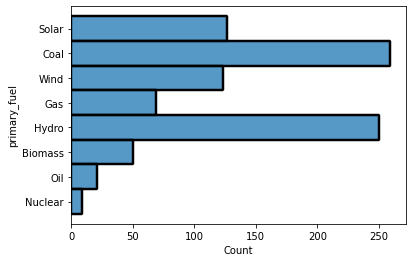

In [33]:
sns.histplot(data = data, y = 'primary_fuel')

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

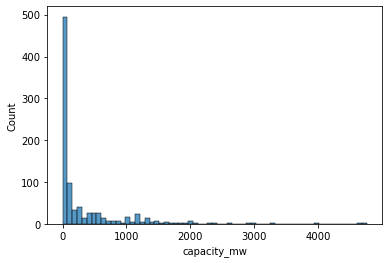

In [34]:
sns.histplot(data = data, x = 'capacity_mw')

<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

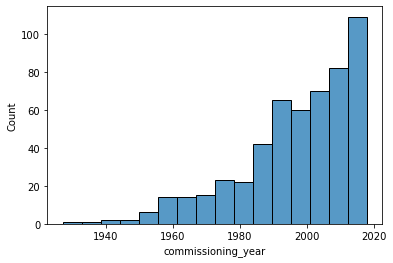

In [35]:
sns.histplot(data = data, x = 'commissioning_year')

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Count'>

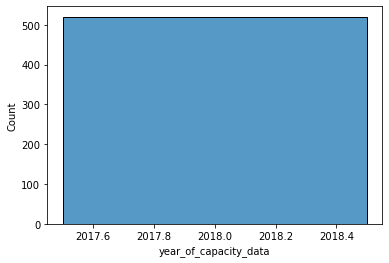

In [37]:
sns.histplot(data = data, x = 'year_of_capacity_data')

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Count'>

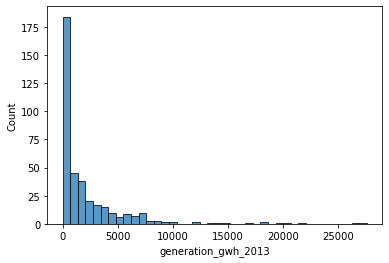

In [39]:
sns.histplot(data = data, x = 'generation_gwh_2013')

In [45]:
data=data.drop(columns=['other_fuel2', 'other_fuel3', 'url', 'gppd_idnr', 'name', 'commissioning_year'])

KeyError: "['other_fuel2' 'url' 'gppd_idnr' 'name' 'commissioning_year'] not found in axis"

In [42]:
data = data.drop(columns = ['country', 'country_long'])

In [43]:
data = data.drop(columns = ['latitude', 'longitude'])

In [44]:
data.head()

,name,gppd_idnr,capacity_mw,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [45]:
data['commissioning_year'].value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1939.0     1
1927.0     1
1949.0     1
1956.0     1
1969.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [60]:
for i in range(0,data.shape[0]):
    if data['commissioning_year'][i] == 2018:
        data['generation_gwh_2013'][i] = 0
        data['generation_gwh_2014'][i] = 0
        data['generation_gwh_2015'][i] = 0
        data['generation_gwh_2016'][i] = 0
        data['generation_gwh_2017'][i] = 0
    elif data['commissioning_year'][i] == 2017:
        data['generation_gwh_2013'][i] = 0
        data['generation_gwh_2014'][i] = 0
        data['generation_gwh_2015'][i] = 0
        data['generation_gwh_2016'][i] = 0
    elif data['commissioning_year'][i] == 2016:
        data['generation_gwh_2013'][i] = 0
        data['generation_gwh_2014'][i] = 0
        data['generation_gwh_2015'][i] = 0
    elif data['commissioning_year'][i] == 2015:
        data['generation_gwh_2013'][i] = 0
        data['generation_gwh_2014'][i] = 0
    else:
        data['commissioning_year'][i] == 2014
        data['generation_gwh_2013'][i] = 0

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    908 non-null    object 
 1   gppd_idnr               908 non-null    object 
 2   capacity_mw             908 non-null    float64
 3   primary_fuel            908 non-null    object 
 4   other_fuel1             199 non-null    object 
 5   commissioning_year      528 non-null    float64
 6   owner                   342 non-null    object 
 7   source                  908 non-null    object 
 8   url                     908 non-null    object 
 9   geolocation_source      889 non-null    object 
 10  year_of_capacity_data   520 non-null    float64
 11  generation_gwh_2013     908 non-null    float64
 12  generation_gwh_2014     449 non-null    float64
 13  generation_gwh_2015     450 non-null    float64
 14  generation_gwh_2016     450 non-null    fl

In [56]:
range(0,data.shape[0])

17

In [59]:
data['commissioning_year'][0]

2011.0

In [62]:
data['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [63]:
data['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [66]:
data.head()

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.0,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,0.0,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,AES,CDM,WRI,0.0,NaN,NaN,NaN,NaN
3,135.0,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,0.0,617.789264,843.747,886.004428,663.774500
4,1800.0,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,0.0,0.000000,5916.370,6243.000000,5385.579736


In [65]:
data=data.drop(columns=['name','gppd_idnr', 'url', 'generation_data_source', 'year_of_capacity_data'])

In [6]:
data['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64